In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from wordcloud import WordCloud


In [31]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
df = pd.read_csv('data/Restaurant_Reviews.tsv', sep='\t')
df.columns = ['review', 'liked']

In [37]:
df.head()

,review,liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [36]:
df['char_count'] = df['review'].apply(len)
df['word_count'] = df['review'].apply( lambda x: len(x.split()))
df['sent_count'] = df['review'].apply( lambda x: len(nltk.sent_tokenize(x)))

In [74]:
custom_stopwords ={'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", "doesn't"
                    'haven', "haven't", 'isn', 'ma', "is"
                    'hadn', "hadn't", 'hasn',
                    "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn',
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords

corpus = []

for i in range(len(df)):
    test = re.sub('[^a-zA-Z]', " ", df['review'][i] )     
    test = test.split()
    test = [ps.stem(word) for word in test if word not in stop_words]
    test = " ".join(test)

    corpus.append(test)
    
df['processed_text'] = corpus

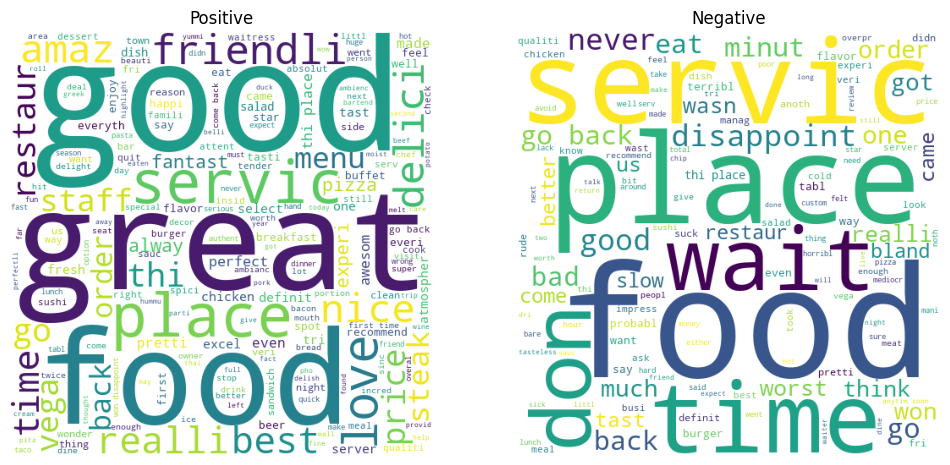

In [93]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
wc = WordCloud(width=500, height=500, min_font_size=8, background_color='white')
pos = wc.generate(df[df['liked'] ==1]['processed_text'].str.cat(sep= " "))
plt.title('Positive')
plt.axis('off')

plt.imshow(pos)


plt.subplot(1,2,2)
neg = wc.generate(df[df['liked'] ==0]['processed_text'].str.cat(sep=" "))
plt.title('Negative')
plt.axis('off')

plt.imshow(neg)   


In [118]:
cv = CountVectorizer(max_features=1500)

x = cv.fit_transform(df['processed_text']).toarray()
y = df['liked']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [119]:
forest = RandomForestClassifier(n_estimators=750)

forest.fit(x_train, y_train)
y_hat = forest.predict(x_test)
accuracy_score(y_test, y_hat)


0.805